In [1]:
import easyidp as idp
from pathlib import Path
idp.__version__

'2.0.0'

In [3]:
roi_path = Path("/ofo-share/str-disp_drone-data-partial/taos/DeltaB-120m_20230310T1701_idptaos.shp")
roi = idp.ROI(roi_path, name_field = "treeID")

[shp][proj] Use projection [NAD83 / UTM zone 10N] for loaded shapefile [DeltaB-120m_20230310T1701_idptaos.shp]


Read shapefile [DeltaB-120m_20230310T1701_idptaos.shp]: 100%|██████████| 1028/1028 [00:05<00:00, 197.27it/s]


In [4]:
roi

<easyidp.ROI> with 1028 items
[0]	2
array([[ 538722.24014117, 4541923.44981991],
       [ 538722.88256377, 4541922.94972251],
       [ 538723.18062856, 4541922.31724937],
       ...,
       [ 538721.15433211, 4541918.78382358],
       [ 538721.34359082, 4541918.99401668],
       [ 538722.24014117, 4541923.44981991]])
[1]	3
array([[ 538698.40186873, 4541922.71855492],
       [ 538698.62229471, 4541922.18784785],
       [ 538699.16423785, 4541921.82076417],
       ...,
       [ 538697.03433211, 4541918.66382358],
       [ 538697.22359082, 4541918.87401668],
       [ 538698.40186873, 4541922.71855492]])
...
[1026]	1423
array([[ 538578.96034615, 4541642.10213547],
       [ 538579.42469595, 4541641.92061786],
       [ 538580.01002675, 4541641.02025929],
       ...,
       [ 538579.19433211, 4541640.86382358],
       [ 538579.38359082, 4541641.07401668],
       [ 538578.96034615, 4541642.10213547]])
[1027]	1424
array([[ 538703.12902491, 4541641.98156888],
       [ 538703.88365907, 4541640.93

In [5]:
dem_path = Path("/ofo-share/str-disp_drone-data-partial/chms/DeltaB-120m_20230310T1701_chm.tif")
roi.get_z_from_dsm(dem_path, mode="point")
roi

Read z values of roi from DSM [DeltaB-120m_20230310T1701_chm.tif]: 100%|██████████| 1028/1028 [00:09<00:00, 105.31it/s]


<easyidp.ROI> with 1028 items
[0]	2
array([[ 538722.24014117, 4541923.44981991,       3.60568285],
       [ 538722.88256377, 4541922.94972251,       4.49704695],
       [ 538723.18062856, 4541922.31724937,       4.94595146],
       ...,
       [ 538721.15433211, 4541918.78382358,      10.73680496],
       [ 538721.34359082, 4541918.99401668,      23.38996315],
       [ 538722.24014117, 4541923.44981991,       3.60568285]])
[1]	3
array([[ 538698.40186873, 4541922.71855492,       6.06748152],
       [ 538698.62229471, 4541922.18784785,       4.29285336],
       [ 538699.16423785, 4541921.82076417,       4.26733923],
       ...,
       [ 538697.03433211, 4541918.66382358,      24.19729042],
       [ 538697.22359082, 4541918.87401668,      24.96240616],
       [ 538698.40186873, 4541922.71855492,       6.06748152]])
...
[1026]	1423
array([[ 538578.96034615, 4541642.10213547,       5.35833931],
       [ 538579.42469595, 4541641.92061786,       2.2177949 ],
       [ 538580.01002675, 4541641.

In [7]:
msproj = Path("/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/yuba3subset/yuba3subset-120mAnd80m-22-keeppoints_20230102T0559.psx")

In [42]:
msproj = Path("/ofo-share/str-disp_drone-data-partial/str-disp_drone-data_imagery-processed/projects/120m-01/with80m/DeltaB-add-80-to-120_20230316T2151.psx")

In [7]:
msproj = Path("/ofo-share/tnc-yuba-2021/temp-processed/example-nested-folders/order-base_20230401T1828.psx")

In [8]:
ms = idp.Metashape(msproj, chunk_id=0)

IndexError: Index [6] out of range (0, 1)

In [6]:
ms

<'order-base_manual.psx' easyidp.Metashape object with 1 active chunks>

  id  label
----  -------
-> 0  Chunk 1

In [78]:
ms.photos[0].label

'PART_02/100MEDIA/DJI_0699.JPG'

In [79]:
for i in range(len(ms.photos)):
    ms.photos[i].label = "newlabel" + str(i) 

In [81]:
ms.photos[2].label

'newlabel2'

In [82]:
root_dir = Path("/ofo-share/tnc-yuba-2021/")

for p in ms.photos:
    p
    path = Path(p.path)
    relpath = path.relative_to(root_dir)
    p.label = str(relpath)

ValueError: '/ofo-share/str-disp_drone-data-partial/str-disp_drone-data_imagery-missions/DeltaB/DeltaB_120m/PART_02/100MEDIA/DJI_0699.JPG' is not in the subpath of '/ofo-share/tnc-yuba-2021' OR one path is relative and the other is absolute.

In [119]:
ms.photos[200].label

'newlabel200'

In [83]:
img_dict_ms = roi.back2raw(ms)

Backward roi to raw images: 100%|██████████| 1028/1028 [01:12<00:00, 14.14it/s]


In [84]:
img_dict_ms

{'2': {'PART_02/100MEDIA/DJI_0699.JPG': array([[2575.20317719, 1417.42298313],
         [2574.05460024, 1415.18691889],
         [2573.94209963, 1413.15448111],
         [2574.20547423, 1411.49006362],
         [2575.78847825, 1412.16640376],
         [2578.55692757, 1410.25018374],
         [2579.25808601, 1410.76565253],
         [2579.96111939, 1412.25154418],
         [2581.00511902, 1412.93930319],
         [2581.15044603, 1411.7168709 ],
         [2579.30346051, 1409.08404808],
         [2579.41227295, 1409.97591048],
         [2579.58111542, 1407.21986683],
         [2580.01484536, 1405.36413785],
         [2583.11086311, 1406.86424798],
         [2584.8249374 , 1409.19154554],
         [2586.17163716, 1410.59159825],
         [2584.22632281, 1407.15706629],
         [2583.74913453, 1414.53399254],
         [2582.02506608, 1414.55629819],
         [2581.10271602, 1415.45068086],
         [2580.02523545, 1417.04605074],
         [2578.7630622 , 1416.98507692],
         [2577.4459

In [ ]:
# Dict to table



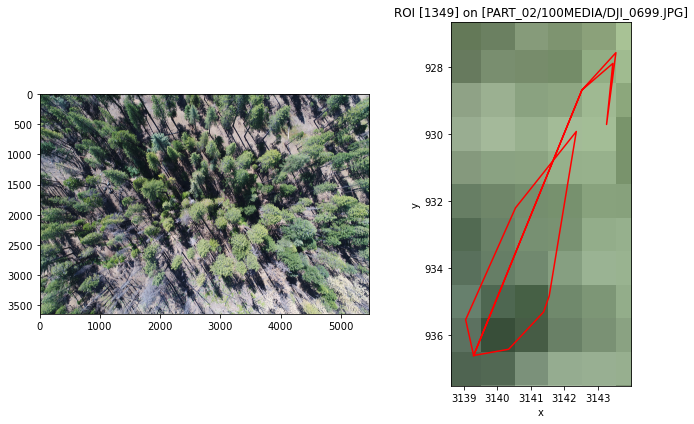

<Figure size 640x480 with 0 Axes>

In [94]:
ms.show_roi_on_img(img_dict_ms, "1349", "PART_02/100MEDIA/DJI_0699.JPG")

In [ ]:
img_dict_ms = roi.back2raw(ms, save_folder = "/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/crown_delin/crowns_02_crops/")